In [2]:
from sqlalchemy import create_engine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
db_host = '18.136.56.185:3306'
username = 'dm_team2'
user_pass = 'dm_team1118#'
db_name = 'project_sales'

In [4]:
# Connection String
conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
conn.table_names()

['data']

In [5]:
query = 'select * from data' # query string
data = pd.read_sql(query,conn) # dt is a datframe
print(data.shape)

(7422, 9)


In [6]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [7]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [8]:
dt = data.copy()

In [9]:
dt["Status"].replace({"Open": "Low Potential", "Potential": "High Potential",
                      "In Progress Positive":"High Potential", "Not Responding":"Low Potential",
                      "Just Enquiry":"Low Potential", "Junk Lead":"Low Potential", "CONVERTED":"Low Potential",
                      "In Progress Negative":"Low Potential", "LOST":"Low Potential", "Long Term":"High Potential",
                      "converted":"Low Potential"}, inplace=True)

In [10]:
dt.shape

(7422, 9)

In [11]:
qry = 'Select Distinct Status from data'
val = pd.read_sql(qry,conn)
val

,Status
0,Open
1,Potential
2,In Progress Positive
3,Not Responding
4,Just Enquiry
5,Junk Lead
6,CONVERTED
7,In Progress Negative
8,LOST
9,Long Term


In [12]:
data["Status"].replace({"Open": "Low Potential", "Potential": "High Potential",
                      "In Progress Positive":"High Potential", "Not Responding":"Low Potential",
                      "Just Enquiry":"Low Potential", "Junk Lead":"Low Potential", "CONVERTED":"Low Potential",
                      "In Progress Negative":"Low Potential", "LOST":"Low Potential", "Long Term":"High Potential",
                      "converted":"Low Potential"}, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data.Product_ID = enc.fit_transform(data.Product_ID)
data.Source = enc.fit_transform(data.Source)
data.Sales_Agent = enc.fit_transform(data.Sales_Agent)
data.Delivery_Mode = enc.fit_transform(data.Delivery_Mode)
data.Location = enc.fit_transform(data.Location)
data.Status = enc.fit_transform(data.Status)
data.head(1)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,0,25,984XXXXXXX,aXXXXXXX@gmail.com,3,0,4,1


In [14]:
from collections import Counter
print(Counter(data.Status))

Counter({1: 5425, 0: 1997})


In [15]:
qry = 'Select Distinct Product_ID from data'
val = pd.read_sql(qry,conn)
val

,Product_ID
0,
1,9
2,19
3,18
4,15
5,27
6,5
7,2
8,3
9,25


In [16]:
qry = 'Select Distinct Source from data'
val = pd.read_sql(qry,conn)
val

,Source
0,Website
1,
2,Live Chat-Google Organic
3,Call
4,Live Chat-Direct
5,By Recommendation
6,Customer Referral
7,Live Chat-Blog
8,Live Chat -PPC
9,Live Chat-Google Ads


In [17]:
X = data.loc[:,["Product_ID","Source","Sales_Agent","Location","Delivery_Mode"]]
y = data.loc[:,["Status"]]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5195, 5)
(2227, 5)
(5195, 1)
(2227, 1)


# Univariate Analysis

### Frequency table of a variable gives count of each category in that variable

In [19]:
dt['Status'].value_counts()

Low Potential     5425
High Potential    1997
Name: Status, dtype: int64

In [20]:
# To get proportion
dt['Status'].value_counts(normalize=True)

Low Potential     0.730935
High Potential    0.269065
Name: Status, dtype: float64

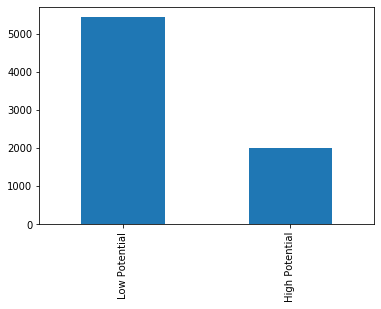

In [21]:
dt['Status'].value_counts().plot(kind='bar')

### Independent variable(Categorical)

In [22]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

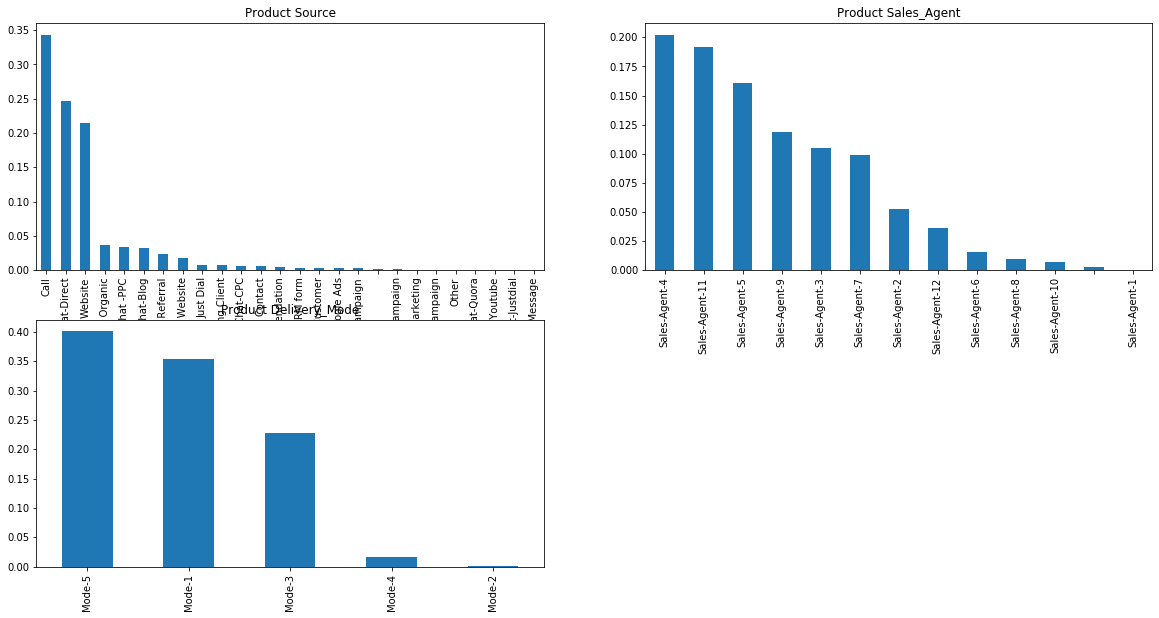

In [23]:
plt.subplot(221)
dt['Source'].value_counts(normalize=True).plot(kind='bar', figsize=(20,10), title='Product Source')
plt.subplot(222)
dt['Sales_Agent'].value_counts(normalize=True).plot(kind='bar', title='Product Sales_Agent')
plt.subplot(223)
dt['Delivery_Mode'].value_counts(normalize=True).plot(kind='bar', title='Product Delivery_Mode')
plt.show()

### Independent variable(Numerical)

In [24]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

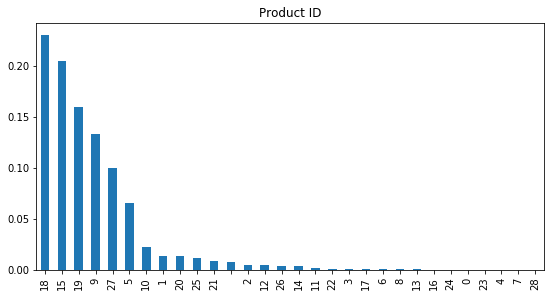

In [25]:
plt.subplot(221)
dt['Product_ID'].value_counts(normalize=True).plot(kind='bar', figsize=(20,10), title='Product ID')

## Bivariate Analysis

### Categorical independent variable v/s Target variable

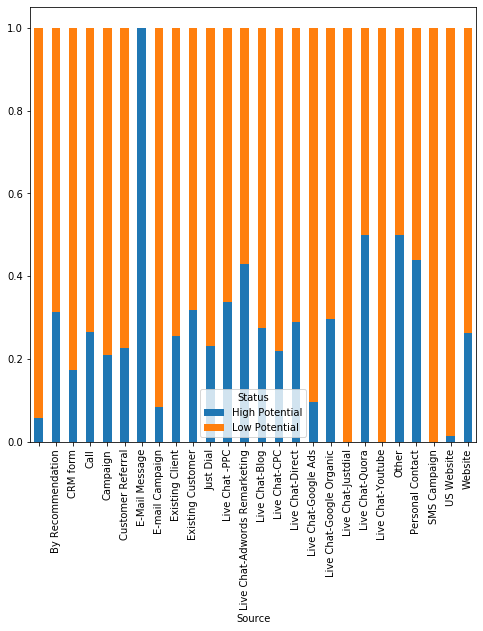

In [26]:
Source = pd.crosstab(dt['Source'],dt['Status'])
Source.div(Source.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))

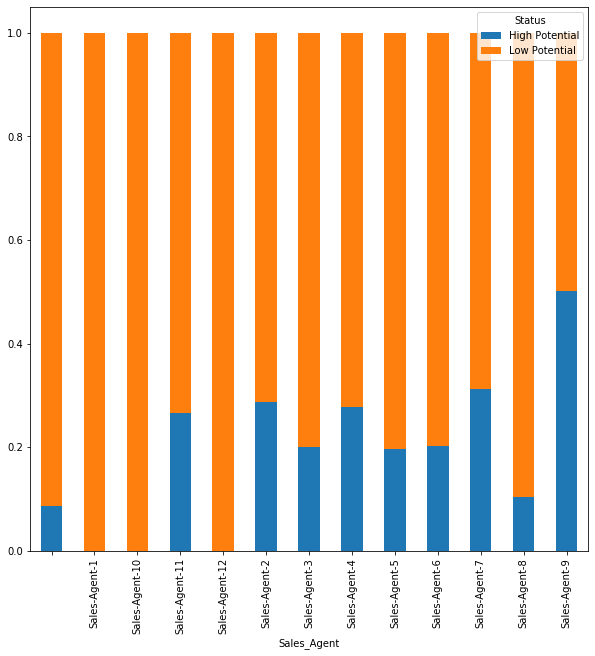

In [27]:
Sales_Agent = pd.crosstab(dt['Sales_Agent'],dt['Status'])
Sales_Agent.div(Sales_Agent.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))

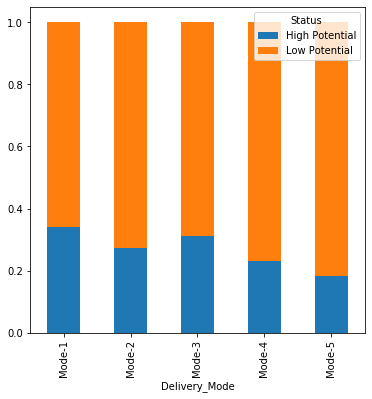

In [28]:
Delivery_Mode = pd.crosstab(dt['Delivery_Mode'],dt['Status'])
Delivery_Mode.div(Delivery_Mode.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

## Numerical independent variable v/s Target variable

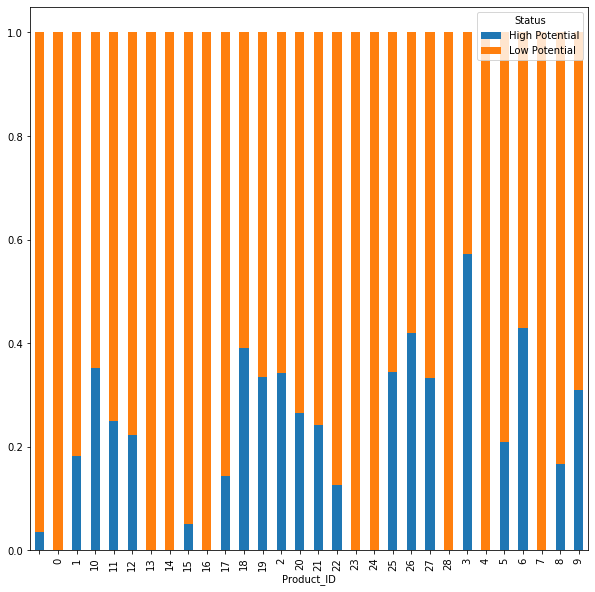

In [29]:
Product_ID = pd.crosstab(dt['Product_ID'],dt['Status'])
Product_ID.div(Product_ID .sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))

## Outlier Analysis

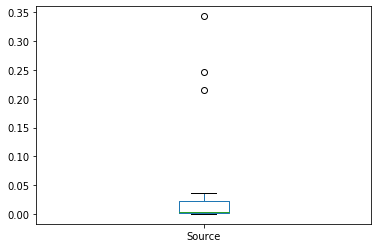

In [30]:
data['Source'].value_counts(normalize=True).plot(kind='box')

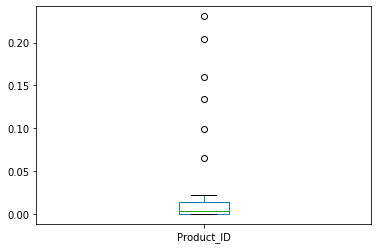

In [31]:
data['Product_ID'].value_counts(normalize=True).plot(kind='box')

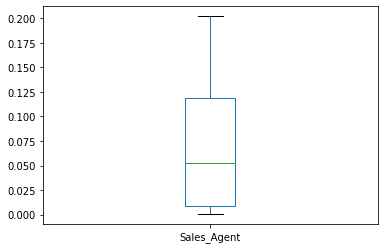

In [32]:
data['Sales_Agent'].value_counts(normalize=True).plot(kind='box')

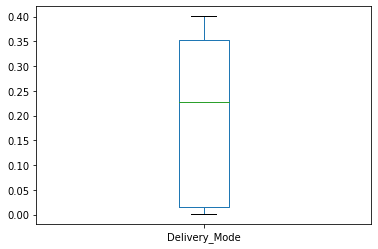

In [33]:
data['Delivery_Mode'].value_counts(normalize=True).plot(kind='box')

In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()  # Hyperparameters tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'max_depth':[8,9,10],
              'random_state': [0,1],
              'n_estimators':[88,89,90], 
             }
grid = GridSearchCV(model,parameters,cv=5)
#grid = RandomizedSearchCV(model,parameters,cv=5)
grid.fit(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d a

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [78]:
grid.best_score_

0.7427902565638415

In [79]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 90, 'random_state': 0}

In [20]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=85,random_state=0,max_depth=13) -73
model = RandomForestClassifier(n_estimators=90,random_state=0,max_depth=8) 
model.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7373147732375392

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.14      0.22       622
           1       0.74      0.97      0.84      1605

    accuracy                           0.74      2227
   macro avg       0.69      0.55      0.53      2227
weighted avg       0.71      0.74      0.67      2227



In [86]:
from xgboost import XGBClassifier
xmodel = XGBClassifier(n_jobs=100,gamma=5,learning_rate=0.5,random_state=10,n_estimators=100, max_depth=15)
xmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=100, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [87]:
y_predict = xmodel.predict(X_test)
accuracy_score(y_test,y_predict)

0.7422541535698248

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.57      0.27      0.37       614
           1       0.77      0.92      0.84      1613

    accuracy                           0.74      2227
   macro avg       0.67      0.60      0.60      2227
weighted avg       0.71      0.74      0.71      2227



In [42]:
# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13)

In [44]:
# define the model
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7305792546026044